In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import certifi
import os
# Указываем Python использовать актуальные сертификаты
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()
os.environ["SSL_CERT_FILE"] = certifi.where()

## 1. Разведочный анализ данных (EDA)

#### 1.1. Загрузка данных

In [3]:
#Скачиваем  файл с яндекс диска
def download_new_file(public_url):

    # Формируем специальную ссылку для получения прямой ссылки на скачивание
    download_api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
    params = {"public_key": public_url}
    # Запрашиваем ссылку для скачивания
    response = requests.get(download_api_url, params=params)
    if response.status_code == 200:
        direct_download_url = response.json().get("href")
        return direct_download_url
    else:
        print("Ошибка получения ссылки:", response.text) 

In [4]:
data = pd.read_csv(download_new_file("https://disk.yandex.ru/d/kr60AUkhGD79kw"))

#### 1.2. Первичный осмотр данных

In [5]:
data.shape

(18691, 28)

In [5]:
data.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,"Дозвон, Отказ",Перезвонит самостоятельно позднее,142052.0,30,W,NaN,1,NaN,NaN
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,738.0,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,"Дозвон, Отказ",Переведен в банк,14462.0,51,W,NaN,7,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 18691 non-null  int64  
 1   age                         18509 non-null  object 
 2   gender_cd                   18433 non-null  object 
 3   region_size                 11402 non-null  object 
 4   foreign_flg                 11402 non-null  float64
 5   entrepreneur_flg            11402 non-null  float64
 6   auto_flg                    11402 non-null  float64
 7   traveler_flg                11402 non-null  float64
 8   partnership_flg             11402 non-null  float64
 9   child_amt                   11402 non-null  float64
 10  realty_type                 11402 non-null  object 
 11  segment_cd                  11402 non-null  object 
 12  bundle_nm                   4703 non-null   object 
 13  confirmed_income            140

In [19]:
data.describe()

,customer_id,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,confirmed_income,predicted_income,state_talk_time_sec,employee_id,emp_age,emp_children_cnt,emp_work_months_cnt
count,1.869100e+04,11402.000000,11402.000000,11402.000000,11402.000000,11402.000000,11402.000000,1407.000000,4.087000e+03,18543.000000,18691.000000,18691.000000,86.000000,18691.000000
mean,3.166681e+08,0.009647,0.138309,0.501666,0.019558,0.790475,0.377741,15370.475146,7.203861e+06,86.350105,163220.261944,35.617944,1.151163,5.401263
std,1.488096e+08,0.097751,0.345239,0.500019,0.138482,0.406987,0.664226,10324.590776,4.594889e+08,127.011570,78054.113022,13.480531,1.367845,3.483958
min,1.423600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7823.500000,-6.274500e+03,0.000000,871.000000,18.000000,0.000000,0.000000
25%,1.828957e+08,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9871.190000,1.282350e+04,24.000000,109957.000000,23.000000,0.000000,2.000000
50%,3.436865e+08,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,12823.500000,1.492120e+04,46.000000,180298.000000,33.000000,0.000000,6.000000
75%,4.334274e+08,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,17013.335000,1.790127e+04,99.000000,224828.000000,46.000000,3.000000,8.000000
max,6.499757e+08,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,147128.410000,2.937498e+10,2671.000000,305477.000000,96.000000,3.000000,11.000000


In [79]:
data.nunique()

customer_id                   17267
age                              75
gender_cd                         2
region_size                       4
foreign_flg                       2
entrepreneur_flg                  2
auto_flg                          2
traveler_flg                      2
partnership_flg                   2
child_amt                         7
realty_type                       4
segment_cd                       45
bundle_nm                         3
confirmed_income               1060
predicted_income               2904
product_cd                       13
functional_cd                    16
finish_dttm                    8908
state_talk_time_sec             715
wo_hit_status_result_desc         2
wo_hit_status_reason_desc       278
employee_id                     726
emp_age                          52
emp_gender_cd                     2
emp_children_cnt                  3
emp_work_months_cnt              12
emp_citizenship_country_cd        2
emp_marital_status_cd       

In [23]:
data.isna().sum()

customer_id                       0
age                             182
gender_cd                       258
region_size                    7289
foreign_flg                    7289
entrepreneur_flg               7289
auto_flg                       7289
traveler_flg                   7289
partnership_flg                7289
child_amt                      7289
realty_type                    7289
segment_cd                     7289
bundle_nm                     13988
confirmed_income              17284
predicted_income              14604
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec             148
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                  2180
emp_children_cnt              18605
emp_work_months_cnt               0
emp_citizenship_country_cd    12487
emp_marital_status_cd       

#### 1.3. Построение аналитических графиков

Итог: по графикам видно, то динамика успешных звонков не совпадает с общей динамикой звонков (количество успешных звонков не меняется при изменении количество звонков в целом).
(конверсия в успех упала в 2024 году по всем продуктам).

В 2024г один продукт показал конверсию в успех на уровне > 30 %, остальные <20%

(ссылка на интерактивные графики из презентации: https://datalens.yandex/5jqvdbqc6rvqr)

In [ ]:
data['call_time'] = pd.to_datetime(data['finish_dttm'])
data['call_time_month'] = data['call_time'].dt.to_period('M').astype(str)

In [55]:
data['call_time_year'] = data['call_time'].dt.to_period('Y').astype(str)

##### 1.3.1 Линейный график распределения звонков во времени

Пик звонков - весна (март - апрель - май) 2024г

Спад звонков - январь 2023г и январь 2024г (причина: много праздничных дней)

С июля 2024г спад по количеству звонков

In [45]:
data_month = data.groupby('call_time_month', as_index = False)\
                                     .agg({'customer_id':'count'})

In [46]:
data_month.head(5)

,call_time_month,customer_id
0,2022-01,295
1,2022-02,306
2,2022-03,123
3,2022-04,175
4,2022-05,212


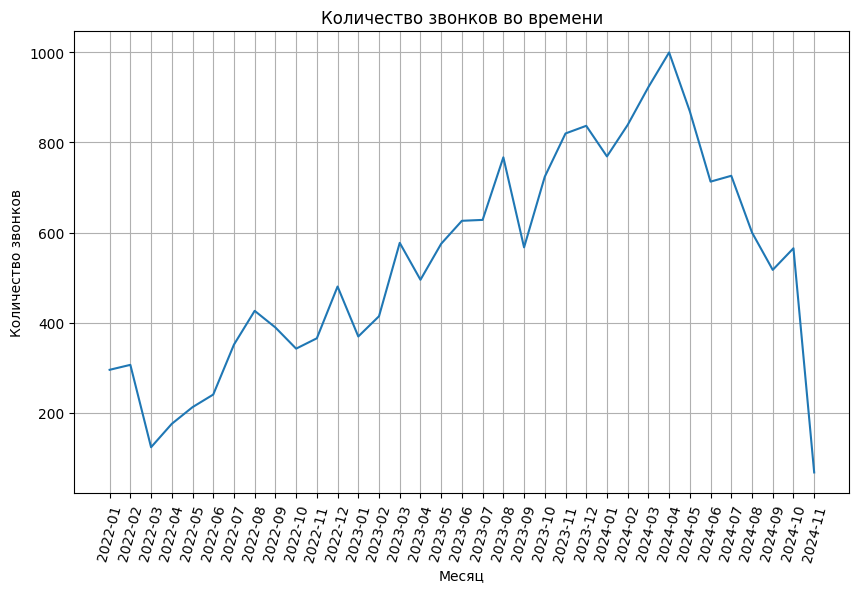

In [19]:
plt.figure(figsize=(10, 6)) 
plt.grid(True)
sns.lineplot(x='call_time_month', y='customer_id', data=data_month)
plt.title('Количество звонков во времени')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')
plt.xticks(rotation=75)
plt.show()

##### 1.3.2 Линейный график распределения звонков во времени с разбивкой по причинам звонков

Топ причинa: Preapprove

Динамика по месяцам "Preapprove"  совпадает с общей динамикой

С июля 2024г спад по количеству звонков

In [23]:
data_month_reason_to_call = data.groupby(['call_time_month','functional_cd'])\
                                     .agg(count =('customer_id','count'))\
                                     .reset_index()

In [24]:
data_month_reason_to_call

,call_time_month,functional_cd,count
0,2022-01,Afterfilling,76
1,2022-01,Agreement,7
2,2022-01,Cold,17
3,2022-01,Downsell,1
4,2022-01,Incoming,11
...,...,...,...
415,2024-11,Meeting,3
416,2024-11,Preapprove,10
417,2024-11,Reutilization,1
418,2024-11,Upsell,11


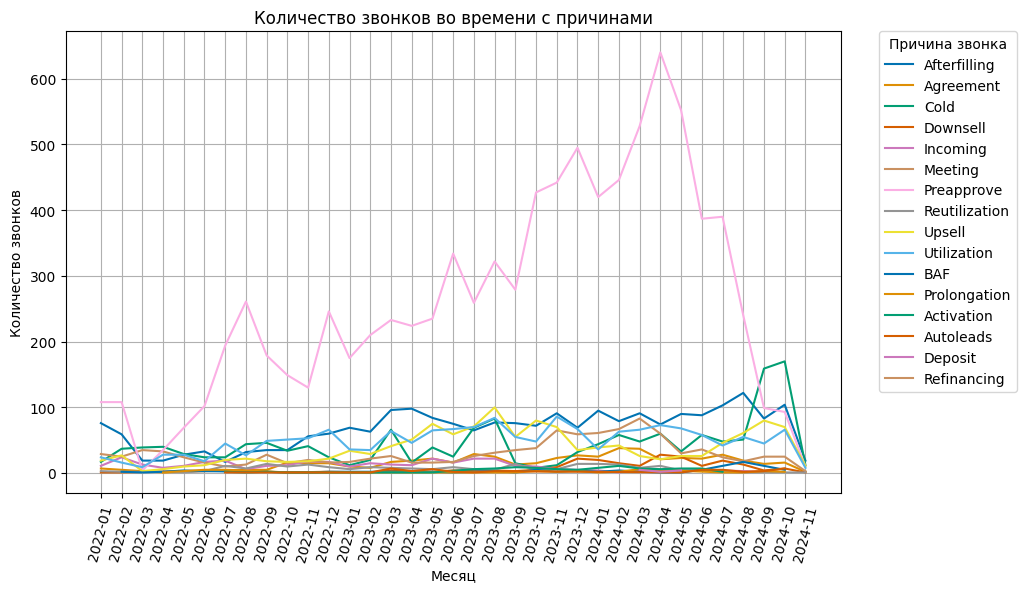

In [40]:
plt.figure(figsize=(10, 6)) 
plt.grid(True)
#palette = sns.color_palette("husl", n_colors=16)
palette = sns.color_palette("colorblind", n_colors=16)
sns.lineplot(x='call_time_month', y='count', data=data_month_reason_to_call, hue = 'functional_cd', palette=palette )
plt.title('Количество звонков во времени с причинами')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')
plt.xticks(rotation=75)
plt.legend(
    title='Причина звонка',
    bbox_to_anchor=(1.05, 1),  # Выносим легенду за пределы графика
    loc='upper left',
    borderaxespad=0.
)
plt.show()



##### 1.3.3 Линейный график распределения звонков во времени с разбивкой по продуктам

Топ продукт: Сredit Cards

Динамика по месяцам продукта "Сredit Cards"  совпадает с общей динамикой

С июля 2024г спад по количеству звонков


In [47]:
data_month_product_to_call = data.groupby(['call_time_month','product_cd'])\
                                     .agg(count =('customer_id','count'))\
                                     .reset_index()

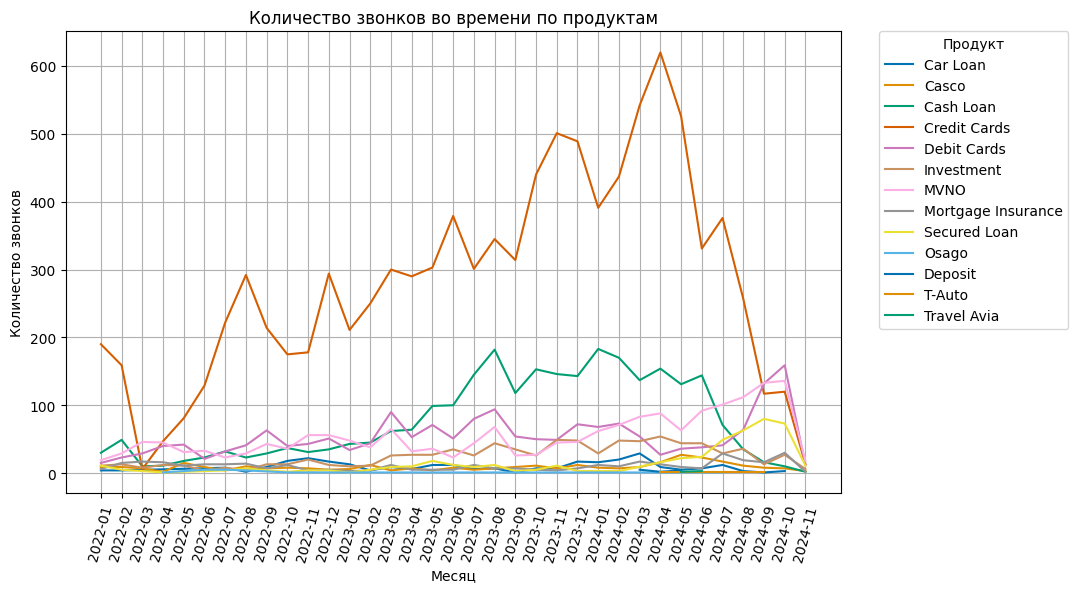

In [50]:
plt.figure(figsize=(10, 6)) 
plt.grid(True)
#palette = sns.color_palette("husl", n_colors=16)
palette = sns.color_palette("colorblind", n_colors=13)
sns.lineplot(x='call_time_month', y='count', data=data_month_product_to_call, hue = 'product_cd', palette=palette )
plt.title('Количество звонков во времени по продуктам')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')
plt.xticks(rotation=75)
plt.legend(
    title='Продукт',
    bbox_to_anchor=(1.05, 1),  # Выносим легенду за пределы графика
    loc='upper left',
    borderaxespad=0.
)
plt.show()

##### 1.3.4 Линейный график распределения звонков во времени с разбивкой по успешности

Динамика успешных звонков не совпадает с общей динамикой количества звонков: количество успешных звонков не меняется при изменении количество звонков в целом, этот тренд характерен для всех продуктов в той или иной степени

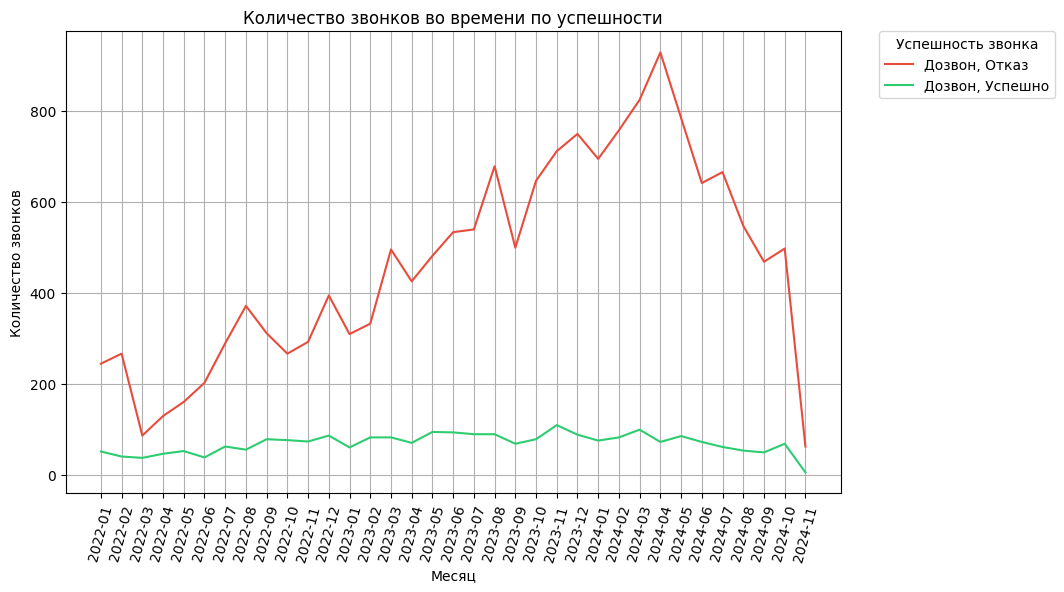

In [59]:
data_month_success_to_call = data.groupby(['call_time_month','wo_hit_status_result_desc'])\
                                     .agg(count =('customer_id','count'))\
                                     .reset_index()

plt.figure(figsize=(10, 6)) 
plt.grid(True)
status_palette = {
    'Дозвон, Успешно': '#2ecc71',  # Яркий зеленый
    'Дозвон, Отказ': '#e74c3c'  # Яркий красный
}
#palette = sns.color_palette("husl", n_colors=16)
#palette = sns.color_palette("colorblind", n_colors=13)
sns.lineplot(x='call_time_month', y='count', data=data_month_success_to_call, hue = 'wo_hit_status_result_desc',palette = status_palette)
plt.title('Количество звонков во времени по успешности')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')
plt.xticks(rotation=75)
plt.legend(
    title='Успешность звонка',
    bbox_to_anchor=(1.05, 1),  # Выносим легенду за пределы графика
    loc='upper left',
    borderaxespad=0.
)
plt.show()

##### 1.3.5 Тепловая карта конверсий звонков в успешные по продуктам по годам
Всего 13 продуктов

В 2022 - 2023г: 10 продуктов

В 2024г: 13 продуктов (новые: Deposit, T-Auto, Travel Avia)

(Возьмем на анализ только те продукты по годам, где количество звонков за год >20)

По результатам тепловой карты видно, что в 2024 году по всем продуктам наблюдается спад метрики конверсии в успешный звонок

In [139]:
data_year_product = data.groupby(['call_time_year','product_cd','wo_hit_status_result_desc'])\
                     .agg(count_all=('customer_id','count'))\
                     .reset_index()

In [153]:
#Возьмем на анализ только те продукты по годам, где количество звонков за год > 5
mask = data_year_product.groupby(['call_time_year', 'product_cd'])['count_all']\
                       .transform('sum') > 20

data_year_product = data_year_product[mask]
data_year_product.head(2)

,call_time_year,product_cd,wo_hit_status_result_desc,count_all
0,2022,Car Loan,"Дозвон, Отказ",67
1,2022,Car Loan,"Дозвон, Успешно",17


In [154]:
data_year_prod_pivot = data_year_product.pivot_table(index = ['call_time_year','product_cd'],
                                                  columns = 'wo_hit_status_result_desc',
                                                  values = 'count_all' ).fillna(0)
data_year_prod_pivot['CR'] = data_year_prod_pivot['Дозвон, Успешно']/(data_year_prod_pivot['Дозвон, Успешно']+data_year_prod_pivot['Дозвон, Отказ'])

In [155]:
data_year_prod_CR_pivot = data_year_prod_pivot.pivot_table(index = 'product_cd',
                                                           columns = 'call_time_year',
                                                           values = 'CR') #.fillna("отсутствует")
data_year_prod_CR_pivot

call_time_year,2022,2023,2024
product_cd,,,
Car Loan,0.202381,0.227723,0.161905
Casco,0.130435,0.217391,0.169118
Cash Loan,0.198171,0.143077,0.037037
Credit Cards,0.113236,0.079796,0.062466
Debit Cards,0.493182,0.355795,0.305398
Investment,0.310078,0.129121,0.053050
MVNO,0.224215,0.206827,0.149114
Mortgage Insurance,0.067669,0.065789,0.091463
Secured Loan,0.088889,0.214286,0.038123


In [165]:
data_year_prod_CR_pivot.to_csv('data_year_prod_CR_pivot.csv', index=True)

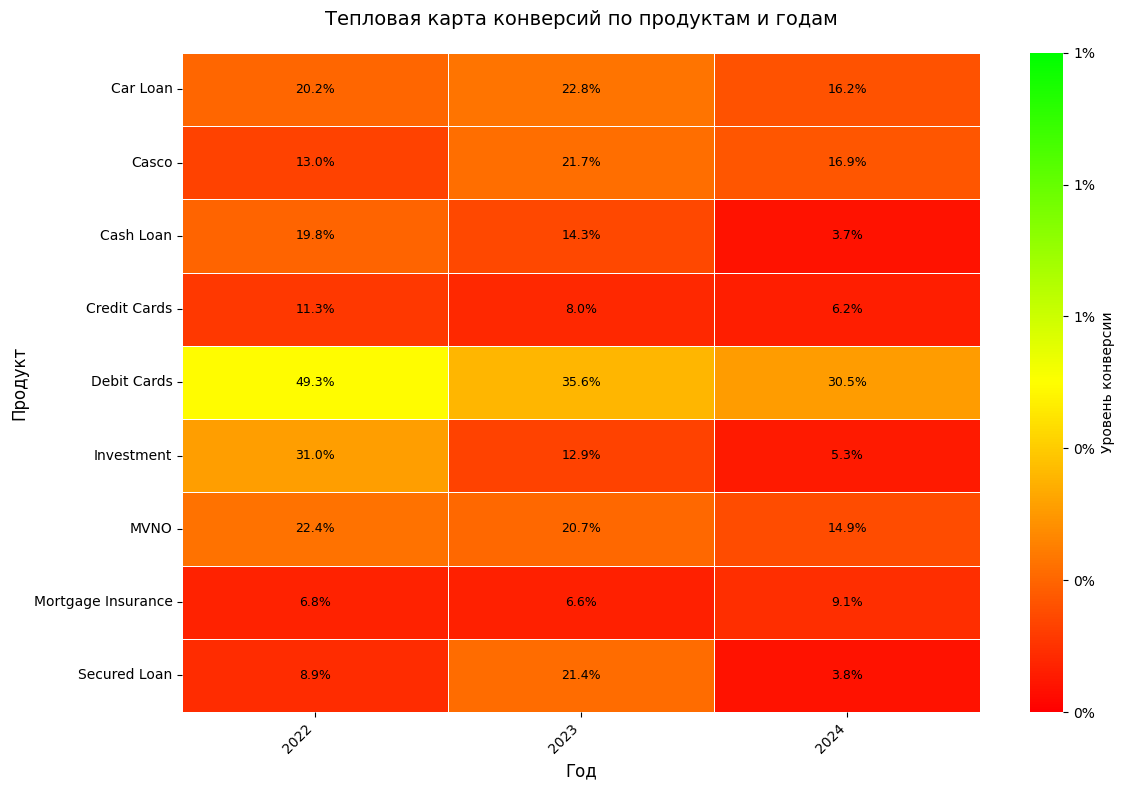

In [164]:
# Создание кастомной цветовой карты

cmap = LinearSegmentedColormap.from_list(
    'conversion_cmap_light',
    ['#ff0000', '#ffff00', '#00ff00'],  # Красный-Желтый-Зеленый
    N=256
)
# cmap = sns.light_palette("steelblue", as_cmap=True)
#cmap = sns.diverging_palette(10, 130, sep=80, as_cmap=True)

# Построение тепловой карты
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    data_year_prod_CR_pivot.astype(float),  # Конвертация в числа
    annot=True,
    fmt=".1%",  # Формат процентов (0.0%)
    cmap=cmap,
    center=0.5,  # Центр на 50% конверсии
    vmin=0,
    vmax=1,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={
        'label': 'Уровень конверсии', 
        'format': '%.0f%%'  # Формат для цветовой шкалы
    },
    annot_kws={
        'fontsize': 9,
        'color': 'black'
    }
)

# Настройка оформления
plt.title('Тепловая карта конверсий по продуктам и годам', pad=20, fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Продукт', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Выделение ячеек с отсутствующими данными
for text in ax.texts:
    if text.get_text() == "nan":
        text.set_text("—")
        text.set_color('gray')
        text.set_fontstyle('italic')

plt.tight_layout()
plt.show()

## 2. Анализ данных с целью выявления зависимости успешных звонков от различных факторов


В датасете 13 продуктов, для выявления факторов, влияющих на успешность продукта, стоит рассмотреть каждый продукт отдельно.
 

 
**Условно датасет можно разделить на 3 составляющих:**

-информация о клиенте 
(на основе данных об NAN можно выделить 3 информацивных поля для дальнейшей работы (customer_id, age,gender_cd ) в остальных полях много пропусков, в 9 полях пропусков одинаковое количесво 7289, однако не удалось выявить причины этому)

-информация о продукте 
(все поля информацивны)

-информация о сотруднике 
(3 поля информацивны (employee_id, emp_age, emp_work_months_cnt ))

Именно эти поля(совокупность) можно рассматривать, как факторы, влияющие на успешность звонков по каждому продукту.




**Возможные гипотезы (проверка по всем продуктам сразу И по каждому в отдельности)**

1
H0 - стаж сотрудников не влияет на процент успешных звонков 
H1 - стаж сотрудников влияет на процент успешных звонков 
(При влиянии провести доп обучение)

2
H0 - возраст сотрудников не влияет на процент успешных звонков 
H1 - возраст сотрудников влияет на процент успешных звонков 
(При влиянии провести доп обучение, консультации)

3
H0 - возраст клиентов не влияет на процент успешных звонков 
H1 - возраст клиентов влияет на процент успешных звонков 
(При влиянии нарастить долю клиентов согласно данному параметру)

4
H0 - пол клиентов не влияет на процент успешных звонков 
H1 - пол клиентов влияет на процент успешных звонков 
(При влиянии нарастить долю клиентов согласно данному параметру)

5
H0 - время звонка(день недели/час) не влияет на процент успешных звонков 
H1 - время звонка(день недели/час) влияет на процент успешных звонков 
(При влиянии сместить время обзвона)
